In [1]:
# Mempetakan zona rawan gempa melalui heatmap spasial berdasarkan gempa berkekuatan tinggi (≥ 6.0 Mw).

Load dan Filter Gempa ≥ 4.0 Mw

In [2]:
import pandas as pd

# Load dan parsing data
df = pd.read_csv("seismic_gap_clean.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
df = df.dropna(subset=['latitude', 'longitude', 'mag'])

# Filter gempa ≥ 4.0 Mw
df_big = df[df['mag'] >= 4.0].copy()


A. Heatmap Statik Spasial (Seaborn)

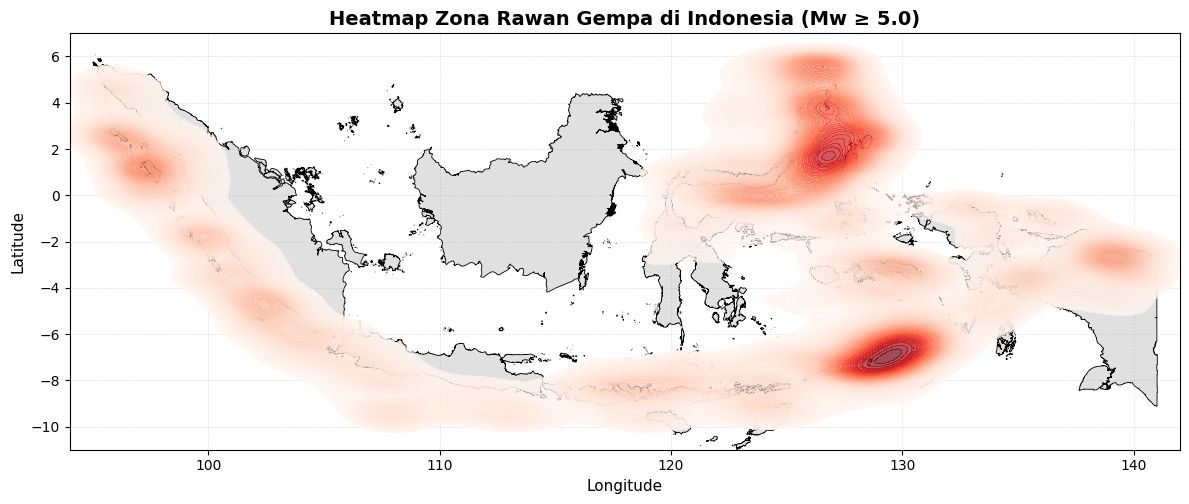

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# 1. Siapkan data
df = pd.read_csv("seismic_gap_clean.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
df = df.dropna(subset=['latitude', 'longitude', 'mag'])
df_big = df[df['mag'] >= 4.0].copy()

# 2. GeoDataFrame
df_big['geometry'] = df_big.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df_big, geometry='geometry', crs="EPSG:4326")

# 3. Shapefile Indonesia
indo = gpd.read_file("gadm41_IDN_shp/gadm41_IDN_0.shp")

# 4. Plot Heatmap
fig, ax = plt.subplots(figsize=(12, 5))  # tampilan panorama
indo.plot(ax=ax, color='#e0e0e0', edgecolor='black', linewidth=0.6, zorder=1)

sns.kdeplot(
    x=gdf['longitude'], y=gdf['latitude'],
    fill=True, cmap='Reds', alpha=0.7,
    bw_adjust=0.5, levels=100, ax=ax, zorder=2
)

# === Tambahan Label Sumbu dan Layout ===
ax.set_title("Heatmap Zona Rawan Gempa di Indonesia (Mw ≥ 5.0)", fontsize=14, weight='bold')
ax.set_xlabel("Longitude", fontsize=11)
ax.set_ylabel("Latitude", fontsize=11)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlim(94, 142)
ax.set_ylim(-11, 7)
ax.set_aspect('equal')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

# Simpan
plt.tight_layout()
plt.savefig("heatmap_zona_rawan_dengan_sumbu.png", dpi=300)
plt.show()


B. Heatmap Interaktif (Folium)

In [4]:
import folium
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd

# 1. Siapkan data
df = pd.read_csv("seismic_gap_clean.csv")
df = df.dropna(subset=['latitude', 'longitude', 'mag'])

# Filter gempa ≥ 4.0 Mw
df_big = df[df['mag'] >= 4.0].copy()

# 2. Inisialisasi Peta
m = folium.Map(
    location=[-2.5, 120], 
    zoom_start=5, 
    tiles='CartoDB positron',
    control_scale=True
)

# 3. Data untuk Heatmap: lat, lon, magnitude as weight
heat_data = [[row['latitude'], row['longitude'], row['mag']] for _, row in df_big.iterrows()]

# 4. Tambahkan Heatmap
HeatMap(
    data=heat_data,
    radius=10,
    blur=15,
    min_opacity=0.4,
    max_val=df_big['mag'].max(),
    max_zoom=6,
).add_to(m)

# 5. Tambahkan Cluster Marker Titik Gempa (opsional)
cluster = MarkerCluster(name='Lokasi Gempa').add_to(m)
for _, row in df_big.iterrows():
    popup = f"""
    <strong>Magnitudo:</strong> {row['mag']}<br>
    <strong>Lokasi:</strong> {row['latitude']}, {row['longitude']}<br>
    <strong>Tanggal:</strong> {row['date']}
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(cluster)

# 6. Layer Control
folium.LayerControl(collapsed=False).add_to(m)

# 7. Simpan peta
m.save("heatmap_zona_rawan_interaktif.html")


ModuleNotFoundError: No module named 'folium'

In [ ]:
# 📝 Catatan:
# Heatmap statik cocok untuk presentasi langsung.

# Heatmap interaktif bisa dieksplorasi manual, sangat berguna untuk publik atau dashboard analitik.

# Analisis ini tidak bersifat prediktif, hanya menunjukkan distribusi historis dari gempa besar.

